### PRN - 18030142043
### Name - Subodh Dharmadhikari
### Course - Predective Analysis 
### MSc.CA.DS.sem2.PredA['Assignment1']

In [73]:
# import required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plot

In [ ]:
# import csv file into dataframe using pandas
csvpath = '/Users/mac/Desktop/hrdata.csv'
dataframe = pd.read_csv(csvpath)
#copy dataframe data to another dataframe
data = dataframe.copy()
# check dimentions of dataframe
data.shape
# dimentions of dataframe - shape(rows,columns)

(4410, 24)

In [75]:
#check how many columns are there in dataframe - explicitly or specifically
data.columns.value_counts().count() 

24

### data.shape[1] also gives same result

In [76]:
# remove spaces if exists before or after of column name string
data.columns.str.replace(' ','') # similarly other extra things can be removed
# there is not any other special character or something appearing which needs to be removed  using replace

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [77]:
# check if any columns are duplicated
data.columns.value_counts().any() > 1 
# no columns are duplicated from result observation - all columns occur only once
# data.columns.drop_duplicates can be used to directly drop duplicate columns if this result turn outs true

False

In [78]:
# confirm all columns occur only once
data.columns.value_counts()

Education                  1
YearsAtCompany             1
BusinessTravel             1
MonthlyIncome              1
TrainingTimesLastYear      1
EducationField             1
MaritalStatus              1
Gender                     1
Department                 1
JobRole                    1
YearsWithCurrManager       1
Attrition                  1
DistanceFromHome           1
StockOptionLevel           1
PercentSalaryHike          1
EmployeeID                 1
JobLevel                   1
YearsSinceLastPromotion    1
Over18                     1
Age                        1
EmployeeCount              1
NumCompaniesWorked         1
StandardHours              1
TotalWorkingYears          1
dtype: int64

In [79]:
# drop records if they are completely duplicate records - rows - all entries same
data.drop_duplicates()
data.shape
# nothing dropped out it seems there aren't any duplicate records - rows -entries

(4410, 24)

In [80]:
# check if some records are missing in any column
data.NumCompaniesWorked.isnull().any() 
# from observation - some records are missing - nulls - NaNs exists

True

In [81]:
# check which columns have missing records
type(data.count()<data.shape[0])#series
missing = data.count()<data.shape[0]
# dropping false showing columns
showm = missing.where(missing == True).dropna()
showm
# from observation -
# NumCompaniesWorked and andTotalWorkingYears gives 1- True means less than dimention have missing records

NumCompaniesWorked    1.0
TotalWorkingYears     1.0
dtype: float64

In [82]:
# find out how may values - are missing -null - Nan
# scalar substraction from series
data.shape[0] - data[['NumCompaniesWorked','TotalWorkingYears']].count() 
# from observation -
#NumCompaniesWorked         total - 4391         19 records missing
#TotalWorkingYears          total - 4401         9 records missing

NumCompaniesWorked    19
TotalWorkingYears      9
dtype: int64

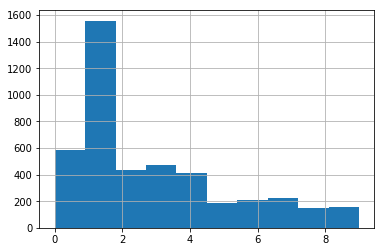

In [83]:
# draw histogram to choose from mean ,median or mode
hist1 = data.NumCompaniesWorked.hist(bins = 10)
# we have to take median because histogram shows skewed distribution

In [84]:
# compare mean ,mode and median 
data.NumCompaniesWorked.mean(),data.NumCompaniesWorked.median(),data.NumCompaniesWorked.mode()

(2.6948303347756775, 2.0, 0    1.0
 dtype: float64)

In [85]:
# Handling Missing Values (Imputation)
# fill missing records in data.NumCompaniesWorked with median
# ceil in case of mean because number of companies worked cant be float
#import math
#m = math.ceil(data.NumCompaniesWorked.mean())
m = data.NumCompaniesWorked.median()
data.NumCompaniesWorked.fillna(m,inplace = True)
data.NumCompaniesWorked.isnull().any()
# observation - no null is present in data.NumCompaniesWorked column

False

In [86]:
# check datatpe of column 
data.NumCompaniesWorked.dtype

dtype('float64')

In [87]:
# apply int64 datatype to column because all values are integers now 
data['NumCompaniesWorked'] = data.NumCompaniesWorked.astype(np.int64)
# check if datatpe of column has been changed or not
data.NumCompaniesWorked.dtype
# from observation data types is changed

dtype('int64')

In [88]:
# check if datatpe of column is changed or not
data.NumCompaniesWorked.dtype

dtype('int64')

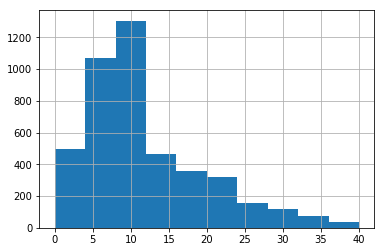

In [89]:
# draw histogram to choose from mean ,median or mode
hist2 = data.TotalWorkingYears.hist(bins = 10)
# we have to take median because histogram shows skewed distribution

In [90]:
# compare mean ,mode and median
data.TotalWorkingYears.mean(),data.TotalWorkingYears.median(),data.TotalWorkingYears.mode()

(11.279936378095888, 10.0, 0    10.0
 dtype: float64)

In [91]:
# Handling Missing Values (Imputation)
# similar procedure for data.TotalWorkingYears column
data.TotalWorkingYears.fillna(data.TotalWorkingYears.median(),inplace = True)
data.TotalWorkingYears.isnull().any()
# observation - no nulls in data.TotalWorkingYearsotal column as it has been replaced by mean

False

In [92]:
# get data types of all columns
data.dtypes
# need to be changed if some irrelivent datatpe assigned to column
# columns seems okay data type wise

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked           int64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [93]:
# get views of unique non-int or float values column wise to check if some random data is added
unqval =[{'Attrition' : pd.unique(data[['Attrition']].values.ravel())},
        {'BusinessTravel' : pd.unique(data[['BusinessTravel']].values.ravel())},
        {'Department' : pd.unique(data[['Department']].values.ravel())},
        {'EducationField' : pd.unique(data[['EducationField']].values.ravel())},
        {'Gender' : pd.unique(data[['Gender']].values.ravel())},
        {'JobRole' : pd.unique(data[['JobRole']].values.ravel())},
        {'MaritalStatus' : pd.unique(data[['MaritalStatus']].values.ravel())},
        {'Over18' : pd.unique(data[['Over18']].values.ravel())}
        ]
unqval


[{'Attrition': array(['No', 'Yes'], dtype=object)},
 {'BusinessTravel': array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)},
 {'Department': array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)},
 {'EducationField': array(['Life Sciences', 'Other', 'Medical', 'Marketing',
         'Technical Degree', 'Human Resources'], dtype=object)},
 {'Gender': array(['Female', 'Male'], dtype=object)},
 {'JobRole': array(['Healthcare Representative', 'Research Scientist',
         'Sales Executive', 'Human Resources', 'Research Director',
         'Laboratory Technician', 'Manufacturing Director',
         'Sales Representative', 'Manager'], dtype=object)},
 {'MaritalStatus': array(['Married', 'Single', 'Divorced'], dtype=object)},
 {'Over18': array(['Y'], dtype=object)}]

### if similar values found in different format that can be handeled with replace or median- mean-mode for nulls

In [94]:
# Adding proper formatting to value 'Non-Travel' in BusinessTravel column
# uderscore is used for other two unique values of the column
data.BusinessTravel.replace('Non-Travel','Non_Travel')

0           Travel_Rarely
1       Travel_Frequently
2       Travel_Frequently
3              Non_Travel
4           Travel_Rarely
5           Travel_Rarely
6           Travel_Rarely
7           Travel_Rarely
8           Travel_Rarely
9              Non_Travel
10          Travel_Rarely
11          Travel_Rarely
12          Travel_Rarely
13             Non_Travel
14          Travel_Rarely
15          Travel_Rarely
16          Travel_Rarely
17             Non_Travel
18          Travel_Rarely
19          Travel_Rarely
20      Travel_Frequently
21          Travel_Rarely
22          Travel_Rarely
23          Travel_Rarely
24      Travel_Frequently
25          Travel_Rarely
26      Travel_Frequently
27          Travel_Rarely
28      Travel_Frequently
29          Travel_Rarely
              ...        
4380    Travel_Frequently
4381        Travel_Rarely
4382        Travel_Rarely
4383        Travel_Rarely
4384        Travel_Rarely
4385        Travel_Rarely
4386        Travel_Rarely
4387        

In [95]:
# Dropping column 'Over18' because it doesnt have variations - unary variable
data.drop(['Over18'],axis=1,inplace=True)
data.shape

(4410, 23)

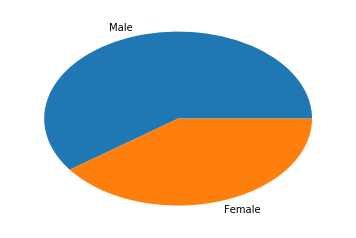

In [96]:
###Gender Ratio
label = 'Male','Female'
d=data["Gender"].value_counts()
plot.pie(d,labels=label)
plot.show()

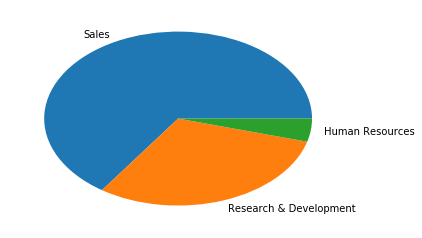

In [97]:
# Department devision
plot.pie(data.Department.value_counts(),labels = ('Sales', 'Research & Development', 'Human Resources'))
plot.show()

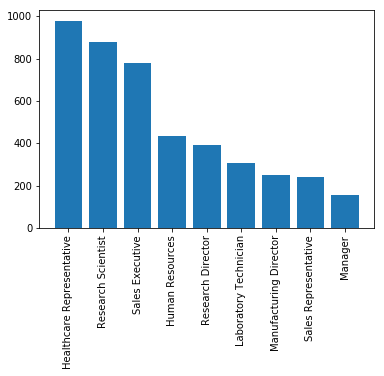

In [98]:
# Jobrole wise count
x = ['Healthcare Representative', 'Research Scientist',
         'Sales Executive', 'Human Resources', 'Research Director',
         'Laboratory Technician', 'Manufacturing Director',
         'Sales Representative', 'Manager']
plot.bar(x, data.JobRole.value_counts(),align='center')
plot.xticks(rotation=90)
plot.show()

In [99]:
# Numeric slight insights of data
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.691837,15.209524,8.0,0.793878,11.277324,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.493912,3.659108,0.0,0.851883,7.774490,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [100]:
# EmployeeCount is just metioning digit one in all columns thatswhy dropping - unary variable
data.drop(['EmployeeCount'],axis=1,inplace=True)
# Employee id is number representation of records - its not feature 
data.drop(['EmployeeID'],axis=1,inplace=True)
# Standard hours holds unary value
data.drop(['StandardHours'],axis=1,inplace=True)
data.shape
# Atrition is target and other 20 are features

(4410, 20)

In [101]:
features = list((data.columns[2:20],data.columns[0:1]))
print(features)


target = data.columns[1:2]
print(target)

print('only numeric data features are shown in heatmap' )

[Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object'), Index(['Age'], dtype='object')]
Index(['Attrition'], dtype='object')
only numeric data features are shown in heatmap


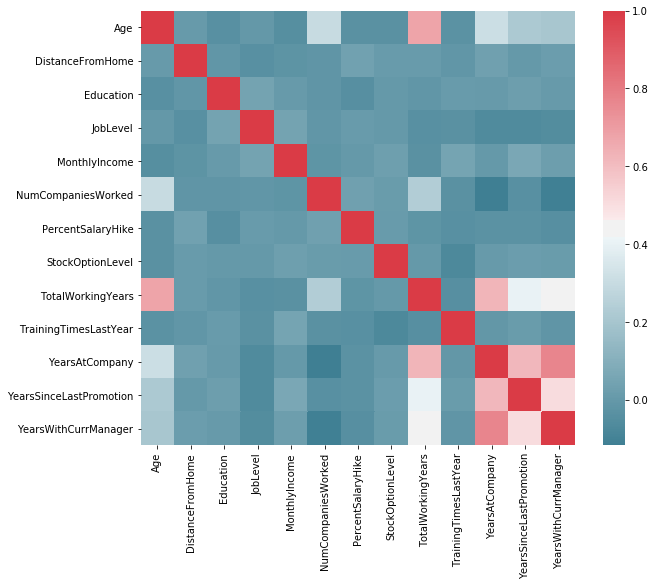

In [102]:
f,ax = plot.subplots(figsize=(10, 8))
cr = data.corr()
sb.heatmap(cr, mask=np.zeros_like(cr,dtype=np.bool), 
cmap=sb.diverging_palette(220,10, as_cmap=True),
square=True, ax=ax)
plot.show()

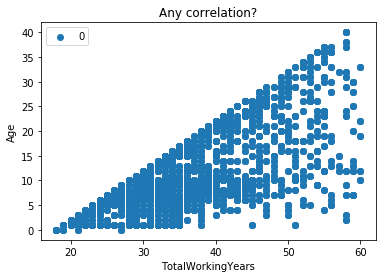

In [103]:
fig, ax = plot.subplots(1)
for i in range(1):
    x=data['Age'] 
    y=data['TotalWorkingYears'], 
    ax.scatter(x,y, label=str(i))
plot.ylabel("Age") 
plot.xlabel("TotalWorkingYears") 
plot.legend(loc="best") 
plot.title("Any correlation?") 
plot.show()

### Interpretation - As age increases total working years also increases 

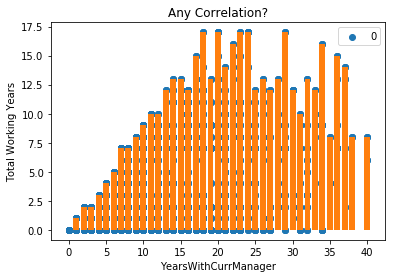

In [104]:
fig,ax = plot.subplots(1)
for i in range(1):
    x=data['TotalWorkingYears']
    y=data['YearsWithCurrManager']
    ax.scatter(x,y,label=str(i))
plot.ylabel("Total Working Years")
plot.xlabel("YearsWithCurrManager")
plot.legend(loc="best")
plot.title("Any Correlation?")
plot.bar(x,y)
plot.show()

### Interpretation - most of the employees who stays for long period works under same manager most of the time

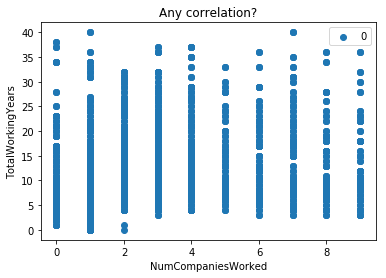

In [105]:
fig, ax = plot.subplots(1)
for i in range(1):
    x=data['NumCompaniesWorked'] 
    y=data['TotalWorkingYears'], 
    ax.scatter(x,y, label=str(i))
plot.xlabel("NumCompaniesWorked") 
plot.ylabel("TotalWorkingYears") 
plot.legend(loc="best") 
plot.title("Any correlation?") 
plot.show()

### Interpretation - Some people change companies for growth and some stays with same company or some people stay for longer period 

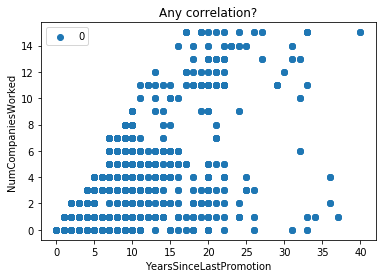

In [106]:
fig, ax = plot.subplots(1)
for i in range(1):
    x=data['YearsAtCompany'] 
    y=data['YearsSinceLastPromotion'], 
    ax.scatter(x,y, label=str(i))
plot.ylabel("NumCompaniesWorked") 
plot.xlabel("YearsSinceLastPromotion") 
plot.legend(loc="best") 
plot.title("Any correlation?") 
plot.show()

### Interpretation - People who changes frequently have to wait for promotion eventually some of them leave this company

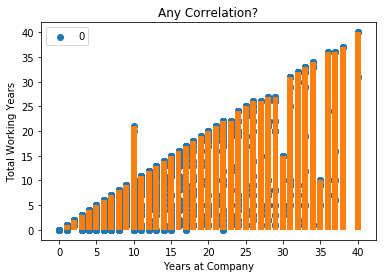

In [107]:
fig,ax = plot.subplots(1)
for i in range(1):
    x=data['TotalWorkingYears']
    y=data['YearsAtCompany']
    ax.scatter(x,y,label=str(i))
plot.ylabel("Total Working Years")
plot.xlabel("Years at Company")
plot.legend(loc="best")
plot.title("Any Correlation?")
plot.bar(x,y)
plot.show()

### Interpretation - Most of the employees work for longer time in this company

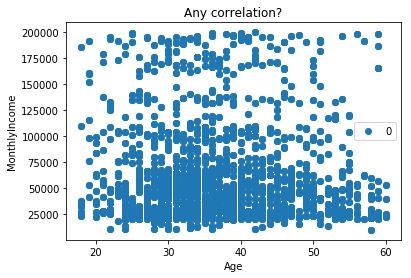

In [108]:
fig, ax = plot.subplots(1)
for i in range(1):
    x=data['Age'] 
    y=data['MonthlyIncome'], 
    ax.scatter(x,y, label=str(i))
plot.xlabel("Age") 
plot.ylabel("MonthlyIncome") 
plot.legend(loc="best") 
plot.title("Any correlation?") 
plot.show()

#### Salary is not proportional to age in most of the cases and most of the people earn below 7.5 lpa